<a href="https://colab.research.google.com/github/JALVARADORUIZ/Magister_BigData_UB/blob/main/M6_AI2_AlvaradoRuizJoseArmando_labelencoded.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*PADAWAN*: 


##JOSE ARMANDO ALVARADO RUIZ

# **Tema 2. KNN**

**Entrega: ACCIDENTES CEREBROVACULARES**


# **Descripción de la tarea**

###Contexto

Según la Organización Mundial de la Salud (OMS), el accidente cerebrovascular es la segunda causa principal de muerte a nivel mundial, responsable de, aproximadamente, el 11% del total de muertes.

Un accidente cerebrovascular ocurre cuando el suministro de sangre a una parte del cerebro se interrumpe o se reduce, lo que impide que el tejido cerebral reciba oxígeno y nutrientes. Las células cerebrales comienzan a morir en minutos.


Este conjunto de datos se utiliza para predecir si es probable que un paciente sufra un accidente cerebrovascular en función de los parámetros de entrada como el sexo, la edad, diversas enfermedades y el tabaquismo. Cada fila de datos proporciona información relevante sobre el paciente.

Información de atributos: 

- Id: identificador único. 
- Gender: "Masculino", "Femenino" u "Otro". 
- Age: edad del paciente. 
- Hypertension: 0 si el paciente no tiene hipertensión, 1 si el paciente tiene hipertensión.
- Heart_disease: 0 si el paciente no tiene ninguna enfermedad cardíaca, 1 si el paciente tiene una enfermedad cardíaca. 
- Ever_married: si ha estado alguna vez casado: "No" o "Yes". 
- Work_type: "Children/Cuidado de hijos", "Govt_job/Funcionario del Gobierno", "Never_worked/Nunca ha trabajado", "Private/trabajador por cuenta ajena" o "Self-employeed/Trabajador por cuenta propia". 
- Residence_type: "Rural" o "Urbano". 
- Avg_glucose_level: nivel medio de glucosa en sangre. 
- Bmi: índice de masa corporal (IMC). 
- Smoking_status: "Fue fumador", "Nunca ha fumado", "Fuma actualmente" o "Desconocido". 
- Stroke: 1 si el paciente tuvo un accidente cerebrovascular o 0 si no lo tuvo. 



### **Importación librerias**

In [181]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.tree import plot_tree
import graphviz
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Carga de Datos y visualización general

In [182]:
# Guardo la data en mi repositorio github para acceso más rápido
file_name = 'https://raw.githubusercontent.com/JALVARADORUIZ/Magister_BigData_UB/main/act1_healthcare-dataset-stroke-data.csv'

# Lectura de datos
df = pd.read_csv(file_name, sep=',', decimal=',')

pd.options.display.max_columns = None

Visualización de 5 registros aleatorios del dataset.

---




In [183]:
df.sample(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
3981,69404,Male,73,0,0,Yes,Govt_job,Rural,76.45,28.7,Unknown,0
1923,44177,Female,60,0,0,Yes,Self-employed,Rural,68.96,30.8,Unknown,0
4631,10445,Male,54,0,0,Yes,Govt_job,Rural,81.78,27.3,Unknown,0
310,45538,Female,43,0,0,Yes,Self-employed,Rural,115.22,21.2,Unknown,0
4108,4631,Male,29,0,0,Yes,Private,Urban,70.51,24.5,Unknown,0


In [184]:
# Estructura dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5110 non-null   int64 
 1   gender             5110 non-null   object
 2   age                5110 non-null   object
 3   hypertension       5110 non-null   int64 
 4   heart_disease      5110 non-null   int64 
 5   ever_married       5110 non-null   object
 6   work_type          5110 non-null   object
 7   Residence_type     5110 non-null   object
 8   avg_glucose_level  5110 non-null   object
 9   bmi                4909 non-null   object
 10  smoking_status     5110 non-null   object
 11  stroke             5110 non-null   int64 
dtypes: int64(4), object(8)
memory usage: 479.2+ KB


In [185]:
# Analisis global de datos estadisticos de la muestra de variables cuantitativas
df.describe()

,id,hypertension,heart_disease,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000
mean,36517.829354,0.097456,0.054012,0.048728
std,21161.721625,0.296607,0.226063,0.215320
min,67.000000,0.000000,0.000000,0.000000
25%,17741.250000,0.000000,0.000000,0.000000
50%,36932.000000,0.000000,0.000000,0.000000
75%,54682.000000,0.000000,0.000000,0.000000
max,72940.000000,1.000000,1.000000,1.000000


El dataset consta de **5110 registros** con **12 variables**.

## **Consideraciones:**

- "Desconocido" en smoking_status significa que la información no está disponible para este paciente. 
- IMC: peso en kilogramos dividido por el cuadrado de la talla en metros (kg/m2). Es un índice utilizado frecuentemente para clasificar el sobrepeso y la obesidad en personas adultas. La OMS define el sobrepeso como un IMC igual o superior a 25, y la obesidad como un IMC igual o superior a 30. 

- La hipertensión, también conocida como tensión arterial alta o elevada, es un trastorno en el que los vasos sanguíneos tienen una tensión persistentemente alta, lo que puede dañarlos. Cada vez que el corazón late, bombea sangre a los vasos y estos llevan la sangre a todas las partes del cuerpo. La tensión arterial es la fuerza que ejerce la sangre contra las paredes de los vasos (arterias) al ser bombeada por el corazón. Cuánto más alta es la tensión, más esfuerzo tiene que realizar el corazón para bombear. Para establecer el diagnóstico de hipertensión, se han de tomar mediciones dos días distintos y, en ambas lecturas, la tensión sistólica ha de ser superior o igual a 140 mmHg y la diastólica superior o igual a 90 mmHg. 

# Preprocesado



#### Analisis de la Data:

In [186]:
columns = columns = ['gender','hypertension','heart_disease','ever_married','work_type','Residence_type','smoking_status','stroke']
for i in range(len(columns)):
    print(df[columns[i]].value_counts(),"\n")



Female    2994
Male      2115
Other        1
Name: gender, dtype: int64 

0    4612
1     498
Name: hypertension, dtype: int64 

0    4834
1     276
Name: heart_disease, dtype: int64 

Yes    3353
No     1757
Name: ever_married, dtype: int64 

Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64 

Urban    2596
Rural    2514
Name: Residence_type, dtype: int64 

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64 

0    4861
1     249
Name: stroke, dtype: int64 



#### Convertir todas las variables categóricas a numéricas.

In [187]:
# Variables nominales (categoricas):

nominals_vars = ["gender","ever_married","work_type","Residence_type","smoking_status"]

In [188]:
# Transformo las variables categoricas a numericas utilizando LabelEncoder() de scikit-learn.preprocessing

for var in nominals_vars:
    label_encoder = LabelEncoder()
    df[var] = label_encoder.fit_transform(df[[var]])

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [189]:
df.head(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67,0,1,1,2,1,228.69,36.6,1,1
1,51676,0,61,0,0,1,3,0,202.21,NaN,2,1
2,31112,1,80,0,1,1,2,0,105.92,32.5,2,1
3,60182,0,49,0,0,1,2,1,171.23,34.4,3,1
4,1665,0,79,1,0,1,3,0,174.12,24,2,1


#### Convertir variables del tipo object a numeric

In [190]:
# Estan expresadas en numeros pero con el dtype = object

#Identificar  variables del tipo object
columns_object = df.select_dtypes(['object']).columns

#convert all categorical variables to numeric
df[columns_object] = df[columns_object].apply(pd.to_numeric)

In [191]:
# Comprobación que todas las variables son numericas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   int64  
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   int64  
 6   work_type          5110 non-null   int64  
 7   Residence_type     5110 non-null   int64  
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   int64  
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(9)
memory usage: 479.2 KB


In [192]:
df.sample(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
3507,34230,0,35.00,0,0,1,3,1,205.97,26.6,1,0
2755,35106,1,3.00,0,0,0,4,1,88.43,17.7,0,0
360,54312,0,76.00,1,0,1,3,1,209.58,NaN,2,0
2281,21036,0,47.00,0,0,1,2,1,131.43,24.3,2,0
4934,32147,1,1.32,0,0,0,4,0,107.02,NaN,0,0


#### Tratamiento Variable smoking_status


Existen 1544 personas de las que se desconoce si fuman o no; vamos a asignar también un número para esta posibilidad. 

In [193]:
df['smoking_status'].value_counts()

2    1892
0    1544
1     885
3     789
Name: smoking_status, dtype: int64

Asi hemos comprobado que tenemos 4 clases para la variable smoking_status.

#### Tratamiento Variable BMI

Existen 201 personas de las que se desconoce su BMI (IMC); vamos a eliminar estos casos para la generación del modelo al tratarse de un bajo porcentaje (4%).


In [194]:
# Filtro las personas que se desconoce su BMI
filtro_bmi_unknown = df[df["bmi"].isnull()]
filtro_bmi_unknown.shape

(201, 12)

In [195]:
# Elimino las filas seleccionadas en el filtro

df.drop(filtro_bmi_unknown.index, axis=0, inplace=True)
df.reset_index(drop = True)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,1,2,1,228.69,36.6,1,1
1,31112,1,80.0,0,1,1,2,0,105.92,32.5,2,1
2,60182,0,49.0,0,0,1,2,1,171.23,34.4,3,1
3,1665,0,79.0,1,0,1,3,0,174.12,24.0,2,1
4,56669,1,81.0,0,0,1,2,1,186.21,29.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4904,14180,0,13.0,0,0,0,4,0,103.08,18.6,0,0
4905,44873,0,81.0,0,0,1,3,1,125.20,40.0,2,0
4906,19723,0,35.0,0,0,1,3,0,82.99,30.6,2,0
4907,37544,1,51.0,0,0,1,2,0,166.29,25.6,1,0


In [196]:
# Variable Gender: La clase 2 solo tiene un registro (asociado a Other) -> Eliminaremos ese registro.

df.drop(df[df.gender == 2].index, axis = 0, inplace=True)
df.reset_index(drop = True)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,1,2,1,228.69,36.6,1,1
1,31112,1,80.0,0,1,1,2,0,105.92,32.5,2,1
2,60182,0,49.0,0,0,1,2,1,171.23,34.4,3,1
3,1665,0,79.0,1,0,1,3,0,174.12,24.0,2,1
4,56669,1,81.0,0,0,1,2,1,186.21,29.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4903,14180,0,13.0,0,0,0,4,0,103.08,18.6,0,0
4904,44873,0,81.0,0,0,1,3,1,125.20,40.0,2,0
4905,19723,0,35.0,0,0,1,3,0,82.99,30.6,2,0
4906,37544,1,51.0,0,0,1,2,0,166.29,25.6,1,0


In [197]:
# Nuevo tamaño del dataframe
df.shape

(4908, 12)

In [198]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4908 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4908 non-null   int64  
 1   gender             4908 non-null   int64  
 2   age                4908 non-null   float64
 3   hypertension       4908 non-null   int64  
 4   heart_disease      4908 non-null   int64  
 5   ever_married       4908 non-null   int64  
 6   work_type          4908 non-null   int64  
 7   Residence_type     4908 non-null   int64  
 8   avg_glucose_level  4908 non-null   float64
 9   bmi                4908 non-null   float64
 10  smoking_status     4908 non-null   int64  
 11  stroke             4908 non-null   int64  
dtypes: float64(3), int64(9)
memory usage: 498.5 KB


El nuevo dataframe cuenta con 4908 registros con 12 variables.

#### Escalar los datos para su uso por el algoritmo.

In [211]:
# Variable respuesta stroke
X = df.drop(['id','stroke'], axis=1)
y = df['stroke'].to_frame()

In [212]:
#Escalado de los datos menos variable respuesta:
scaled = StandardScaler().fit_transform(X)

In [213]:
len(scaled)

4908

In [214]:
# Genero DataFrame con la data escalada
df_scaled = pd.DataFrame(scaled, columns=X.columns)

In [215]:
df_scaled.shape

(4908, 10)

In [216]:
# Genero el nuevo Dataframe con la data escalada y la variable respuesta:
df_scaled = pd.concat([df_scaled,y], axis=1) # aca se me pierden datos
df_scaled.sample(10)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1820,-0.833166,0.759569,-0.318102,-0.228232,0.729270,0.759543,-1.014779,-0.818023,0.242622,-1.288764,0.0
3861,-0.833166,0.493539,-0.318102,-0.228232,0.729270,-0.155713,0.985436,2.574740,0.064358,1.522044,0.0
4465,-0.833166,0.715231,-0.318102,-0.228232,0.729270,-0.155713,0.985436,2.149941,0.433620,-1.288764,0.0
1920,-0.833166,0.493539,-0.318102,-0.228232,0.729270,-0.155713,-1.014779,1.036280,0.255356,-0.351828,0.0
1357,-0.833166,1.468983,-0.318102,-0.228232,0.729270,-1.986225,-1.014779,-0.474717,-0.572299,0.585108,0.0
2180,1.200240,1.025599,-0.318102,-0.228232,0.729270,-0.155713,0.985436,3.200795,0.586417,1.522044,0.0
2419,-0.833166,-1.324334,-0.318102,-0.228232,-1.371234,1.674800,-1.014779,-0.624646,-0.967026,-1.288764,0.0
3635,-0.833166,0.316185,-0.318102,4.381499,0.729270,-1.986225,0.985436,-0.837608,0.841080,1.522044,0.0
3739,-0.833166,0.183170,-0.318102,-0.228232,0.729270,-0.155713,0.985436,-0.860345,-0.839695,-1.288764,0.0
3804,-0.833166,0.094493,-0.318102,-0.228232,0.729270,-0.155713,-1.014779,2.539397,3.324043,1.522044,0.0


In [217]:
df_scaled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5101 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4908 non-null   float64
 1   age                4908 non-null   float64
 2   hypertension       4908 non-null   float64
 3   heart_disease      4908 non-null   float64
 4   ever_married       4908 non-null   float64
 5   work_type          4908 non-null   float64
 6   Residence_type     4908 non-null   float64
 7   avg_glucose_level  4908 non-null   float64
 8   bmi                4908 non-null   float64
 9   smoking_status     4908 non-null   float64
 10  stroke             4908 non-null   float64
dtypes: float64(11)
memory usage: 478.2 KB


# Generar un modelo con el algoritmo de KNN. 

#### Análisis Desbalanceo de datos

In [222]:
df_scaled = df_scaled.sample(frac=1.0, random_state=42)
df_scaled = df_scaled[~df_scaled.isin([np.nan, np.inf, -np.inf]).any(1)]

En este caso, un modelo que lo único que haga sea decir si "el paciente no ha tenido un accidente cerebrovascular" nos daría un "accuracy" del 95.7%.

Stroke: 209, No Stroke: 4699 , ratio: 0.04447754841455629



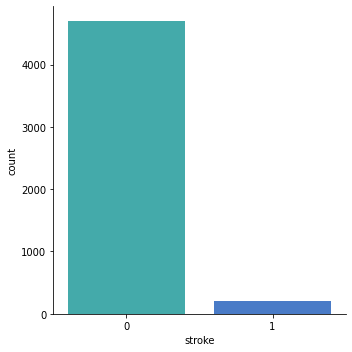

In [223]:
positivo = df[df.stroke==1].shape[0]
negativo = df[df.stroke==0].shape[0]
print("Stroke: " + str(positivo) + ", No Stroke: " + str(negativo), ", ratio: " + str(positivo/negativo) + "\n")
sns.catplot(data=df, x="stroke", kind="count", palette="winter_r", alpha=.8)

In [224]:
# Selección del modelo KNN con Cross Validation

X = df_scaled.iloc[:,0:-1]
Y = df_scaled.iloc[:,-1]

In [225]:
preds_list = []
score_list = []
k_list = []

for k in list(range(1, 20, 2)):
  knn_model = KNeighborsClassifier(n_neighbors=k, weights="uniform", metric="minkowski")
  preds = cross_val_predict(knn_model, X, Y, cv=3, method="predict", n_jobs=3)
  score = cross_val_score(knn_model, X, Y, cv=3, scoring="accuracy")
  k_list.append(k)
  preds_list.append(preds)
  score_list.append(score.mean())

In [226]:
df_scores = pd.DataFrame({"K":k_list, 
                   "score":score_list
                   })

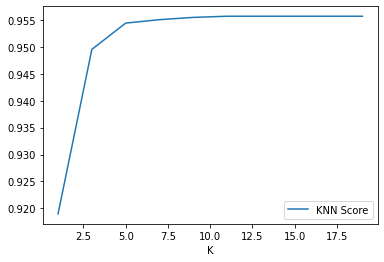

In [227]:
df_scores.set_index("K")["score"].plot(label="KNN Score")
plt.legend()
plt.show();

In [228]:
# Entrenamos modelo
knn_model = KNeighborsClassifier(n_neighbors=5, weights="distance", metric="minkowski")
preds = cross_val_predict(knn_model, X, Y, cv=3, method="predict", n_jobs=3)
score = cross_val_score(knn_model, X, Y, cv=3, scoring="accuracy", n_jobs=3)
score

array([0.95101781, 0.95165394, 0.94971356])

# Evaluación del modelo 

#### Calcular el Accuracy. 

#### Grafica la ROC-Curve.

#### Grafica la Confusion-Matrix.

#### Comenta los resultados. 